# Exploratory Data Analysis on Car Sales

This notebook includes data on car sales from different car dealerships, it has information about the car sold in matters such as its transmission and about the sale itself such as the sales price.

## 1. Importing necessary libraries and loading the data

In [1]:
#libraries 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#loading files
file = 'Downloads/archive/car_prices.csv'
df = pd.read_csv(file)
df.head()

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
0,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg566472,ca,5.0,16639.0,white,black,kia motors america inc,20500.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
1,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg561319,ca,5.0,9393.0,white,beige,kia motors america inc,20800.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
2,2014,BMW,3 Series,328i SULEV,Sedan,automatic,wba3c1c51ek116351,ca,45.0,1331.0,gray,black,financial services remarketing (lease),31900.0,30000.0,Thu Jan 15 2015 04:30:00 GMT-0800 (PST)
3,2015,Volvo,S60,T5,Sedan,automatic,yv1612tb4f1310987,ca,41.0,14282.0,white,black,volvo na rep/world omni,27500.0,27750.0,Thu Jan 29 2015 04:30:00 GMT-0800 (PST)
4,2014,BMW,6 Series Gran Coupe,650i,Sedan,automatic,wba6b2c57ed129731,ca,43.0,2641.0,gray,black,financial services remarketing (lease),66000.0,67000.0,Thu Dec 18 2014 12:30:00 GMT-0800 (PST)


# 2. Initial data assessment

In [3]:
#data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 558837 entries, 0 to 558836
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   year          558837 non-null  int64  
 1   make          548536 non-null  object 
 2   model         548438 non-null  object 
 3   trim          548186 non-null  object 
 4   body          545642 non-null  object 
 5   transmission  493485 non-null  object 
 6   vin           558833 non-null  object 
 7   state         558837 non-null  object 
 8   condition     547017 non-null  float64
 9   odometer      558743 non-null  float64
 10  color         558088 non-null  object 
 11  interior      558088 non-null  object 
 12  seller        558837 non-null  object 
 13  mmr           558799 non-null  float64
 14  sellingprice  558825 non-null  float64
 15  saledate      558825 non-null  object 
dtypes: float64(4), int64(1), object(11)
memory usage: 68.2+ MB


The info method shows that there are 16 colummns with different data types where initially its mayority are object type, also there 558837 entries but it shows that there some missing values withing those entries. Is worth to mention that the column of saledate is not seen in date format it may be solve with a simple transformation.

In [4]:
#counting null values
df.isnull().sum()

year                0
make            10301
model           10399
trim            10651
body            13195
transmission    65352
vin                 4
state               0
condition       11820
odometer           94
color             749
interior          749
seller              0
mmr                38
sellingprice       12
saledate           12
dtype: int64

### 2.3 Data Cleaning process

In [5]:
df_without_n = df.dropna()
df_without_n.isnull().sum()

year            0
make            0
model           0
trim            0
body            0
transmission    0
vin             0
state           0
condition       0
odometer        0
color           0
interior        0
seller          0
mmr             0
sellingprice    0
saledate        0
dtype: int64

After the count of the missing values to see exactly how many values are N/A it is decided to drop this values, this decision is made due to the fact that the each row represent and individual sale and each column add context or information to the particular sale.

In [6]:
#unique values on the body column
df_without_n['body'].unique()

array(['SUV', 'Sedan', 'Convertible', 'Coupe', 'Wagon', 'Hatchback',
       'Crew Cab', 'G Coupe', 'G Sedan', 'Elantra Coupe', 'Genesis Coupe',
       'Minivan', 'Van', 'Double Cab', 'CrewMax Cab', 'Access Cab',
       'King Cab', 'CTS Coupe', 'SuperCrew', 'E-Series Van',
       'Extended Cab', 'SuperCab', 'G Convertible', 'Koup', 'Regular Cab',
       'Quad Cab', 'CTS-V Coupe', 'sedan', 'G37 Convertible', 'Club Cab',
       'Xtracab', 'Q60 Convertible', 'CTS Wagon', 'G37 Coupe', 'Mega Cab',
       'Cab Plus 4', 'Q60 Coupe', 'Beetle Convertible', 'TSX Sport Wagon',
       'Promaster Cargo Van', 'Cab Plus', 'GranTurismo Convertible',
       'CTS-V Wagon', 'Ram Van', 'convertible', 'minivan', 'Transit Van',
       'van', 'regular-cab', 'suv', 'g sedan', 'g coupe', 'hatchback',
       'king cab', 'supercrew', 'g convertible', 'coupe', 'crew cab',
       'wagon', 'e-series van', 'regular cab', 'quad cab',
       'g37 convertible', 'supercab', 'extended cab', 'crewmax cab',
       'double c

After some evaluation, it's shown that there are some repeated body type categories due the usage of uppercase and lowercase since it is taken as different categories when it isn't.

In [7]:
# Count of each unique value to represent the explained earlier.
df_without_n['body'].value_counts().head()

body
Sedan        174647
SUV          100347
sedan         36651
suv           20621
Hatchback     19351
Name: count, dtype: int64

As it's shown there are two sedan types one starts with S in uppercase and with stars with s in lower case.

In [8]:
#normalazing the data in lower case.
df_without_n['body'] = df_without_n['body'].str.lower()

C:\Users\Josh2\AppData\Local\Temp\ipykernel_24200\636716676.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_without_n['body'] = df_without_n['body'].str.lower()


In [9]:
#reviewing the count of body tipes after normalizing it
df_without_n['body'].value_counts().head()

body
sedan        211298
suv          120968
hatchback     23821
minivan       21938
coupe         15960
Name: count, dtype: int64

In [10]:
#using regular expresions to modify the column to be seen as date formats
df_without_n['saledate'] = pd.to_datetime(df_without_n['saledate'].str[:24], format='%a %b %d %Y %H:%M:%S')

C:\Users\Josh2\AppData\Local\Temp\ipykernel_24200\1468083168.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_without_n['saledate'] = pd.to_datetime(df_without_n['saledate'].str[:24], format='%a %b %d %Y %H:%M:%S')


In [11]:
#checking if the change in format worked
df_without_n['saledate'].dtypes

dtype('<M8[ns]')

## 3 Applying descriptive statistics

In [12]:
df_without_n.describe()

,year,condition,odometer,mmr,sellingprice,saledate
count,472325.000000,472325.000000,472325.000000,472325.000000,472325.000000,472325
mean,2010.210980,30.774177,66701.732040,13837.058964,13690.512058,2015-03-07 09:14:26.400889600
min,1990.000000,1.000000,1.000000,25.000000,1.000000,2014-01-01 09:15:00
25%,2008.000000,24.000000,28137.000000,7425.000000,7200.000000,2015-01-22 01:30:00
50%,2012.000000,35.000000,51085.000000,12300.000000,12200.000000,2015-02-17 01:30:00
75%,2013.000000,41.000000,96590.000000,18300.000000,18200.000000,2015-05-21 06:00:00
max,2015.000000,49.000000,999999.000000,182000.000000,230000.000000,2015-07-21 02:30:00
std,3.822151,13.286866,51939.586894,9532.229273,9613.033738,NaN


With the describe method we can see in a group way the tendency of the data and his dispersion to have a general idea of the data. Is worth to mention columns such as selling price and mmr that stands for market making report, that is simple the price in which the car should be sold or at least according to the market. 

The mean selling price is higher that the medium or or 50% selling prices this with the standar desviation suggest that the mean may be affected by extreme values and it seems to be the same case for the market making report, we would take a longer look onto this later.

## 4 Using graph to have a better understanding of the data

## 4.1 dealing with outliers by using boxplots

<Axes: ylabel='sellingprice'>

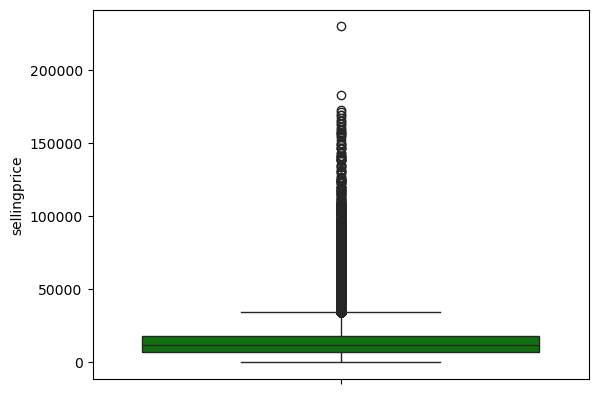

In [13]:
#boxplot
sns.boxplot(df_without_n['sellingprice'], color='green')

The boxplot shows that the selling price go from 0 to 200000 also it seems to show that there are a lot of outliers values, to have a better understanding of this we'll add some context to this. There are other insights that we can gain from this graph but we'll take a look to them when we add more context since this only accounts for the selling price of all the cars and not by model

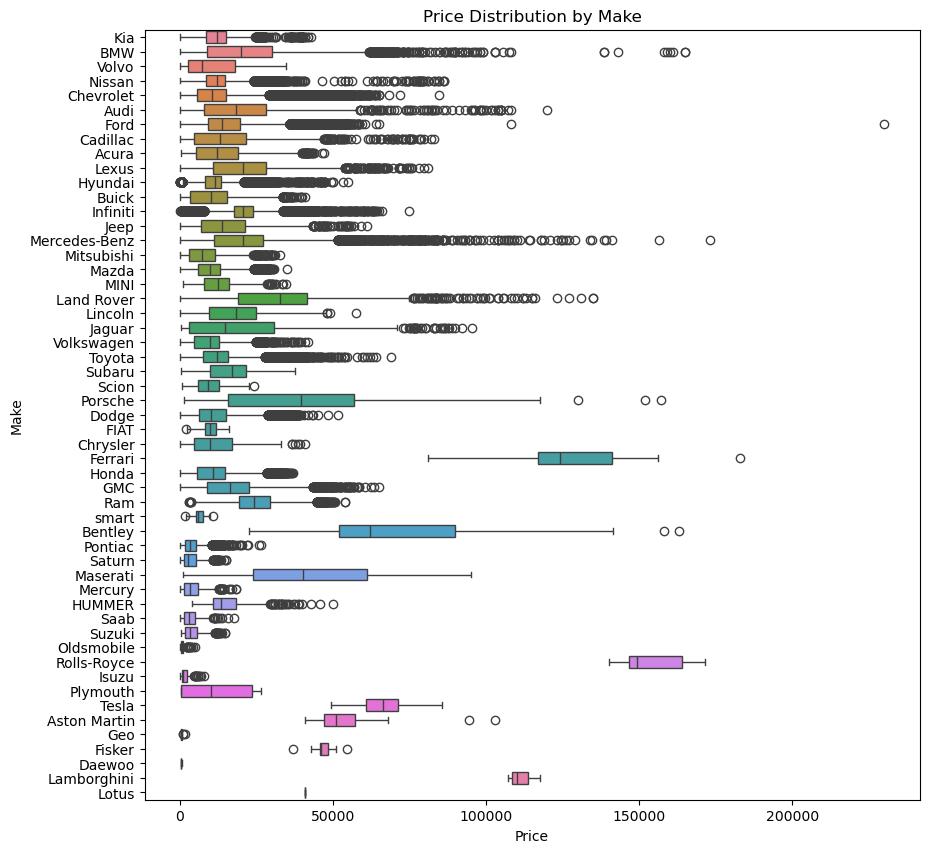

In [14]:
#boxplot of price by model
plt.figure(figsize=(10,10))
sns.boxplot(data=df_without_n, y='make', x='sellingprice', hue='make')
plt.title('Price Distribution by Make')
plt.ylabel('Make')
plt.xlabel('Price')
plt.show()

When we plot the boxplot including the makes on the Y axis it tells a different story and therefore we get more context to it. As an example lets point out that if we simply drop the every value outsite of the whiskers we may end up droping the all sales lamborghini and in this boxplot there isn't a single outlier for that specific brand.

In [15]:
df_by_make= df_without_n.groupby('make')
outliers_by_make = []

for make, group in df_by_make:
    Q1 = group['sellingprice'].quantile(0.25)
    Q3 = group['sellingprice'].quantile(0.75)
    IQR = Q3 - Q1
    umbral_inferior = Q1 - 1.5 * IQR
    umbral_superior = Q3 + 1.5 * IQR
    
    # 3. Identify the outliers for each brand
    outliers = group[(group['sellingprice'] < umbral_inferior) | (group['sellingprice'] > umbral_superior)]
    
    # 4. Store the identified outliers
    outliers_by_make.append(outliers)

# concatenate the outliers on a dataframe 
all_outliers = pd.concat(outliers_by_make)

Since even after adding context to the graph the boxplot still shows external values, we write a single function that iterates by make and apply the interquartile range to the whole sales of an specific car make.

In [16]:
w_outliers = df_without_n.drop(all_outliers.index)
w_outliers.describe()

,year,condition,odometer,mmr,sellingprice,saledate
count,461098.000000,461098.000000,461098.000000,461098.000000,461098.000000,461098
mean,2010.168038,30.718535,67341.554706,13346.167192,13181.315367,2015-03-07 06:11:15.097657856
min,1990.000000,1.000000,1.000000,25.000000,1.000000,2014-01-01 09:15:00
25%,2008.000000,24.000000,28807.000000,7350.000000,7100.000000,2015-01-22 01:15:00
50%,2012.000000,35.000000,51990.500000,12200.000000,12000.000000,2015-02-17 01:30:00
75%,2013.000000,41.000000,97213.750000,17800.000000,17750.000000,2015-05-21 05:30:00
max,2015.000000,49.000000,999999.000000,178000.000000,171500.000000,2015-07-21 02:30:00
std,3.816795,13.211768,51858.327718,8605.333193,8650.286589,NaN


A new dataframe is created by droping the outliers from a copy the dataset

In [17]:
w_outliers = w_outliers.drop(w_outliers[w_outliers['sellingprice'] == 1.0].index)

Using describe it seems that there is sale that it was made for one dollar it's interpreted as a typo and since is only one value is droped

In [18]:
w_outliers.describe()

,year,condition,odometer,mmr,sellingprice,saledate
count,461096.000000,461096.000000,461096.000000,461096.000000,461096.000000,461096
mean,2010.168045,30.718534,67341.777645,13346.164085,13181.372536,2015-03-07 06:11:30.649192448
min,1990.000000,1.000000,1.000000,25.000000,100.000000,2014-01-01 09:15:00
25%,2008.000000,24.000000,28807.000000,7350.000000,7100.000000,2015-01-22 01:15:00
50%,2012.000000,35.000000,51991.000000,12200.000000,12000.000000,2015-02-17 01:30:00
75%,2013.000000,41.000000,97214.000000,17800.000000,17750.000000,2015-05-21 05:30:00
max,2015.000000,49.000000,999999.000000,178000.000000,171500.000000,2015-07-21 02:30:00
std,3.816785,13.211780,51858.319075,8605.340286,8650.261795,NaN


C:\Users\Josh2\AppData\Local\Temp\ipykernel_24200\2413373698.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=w_outliers, y='make', x='sellingprice', palette='Paired')


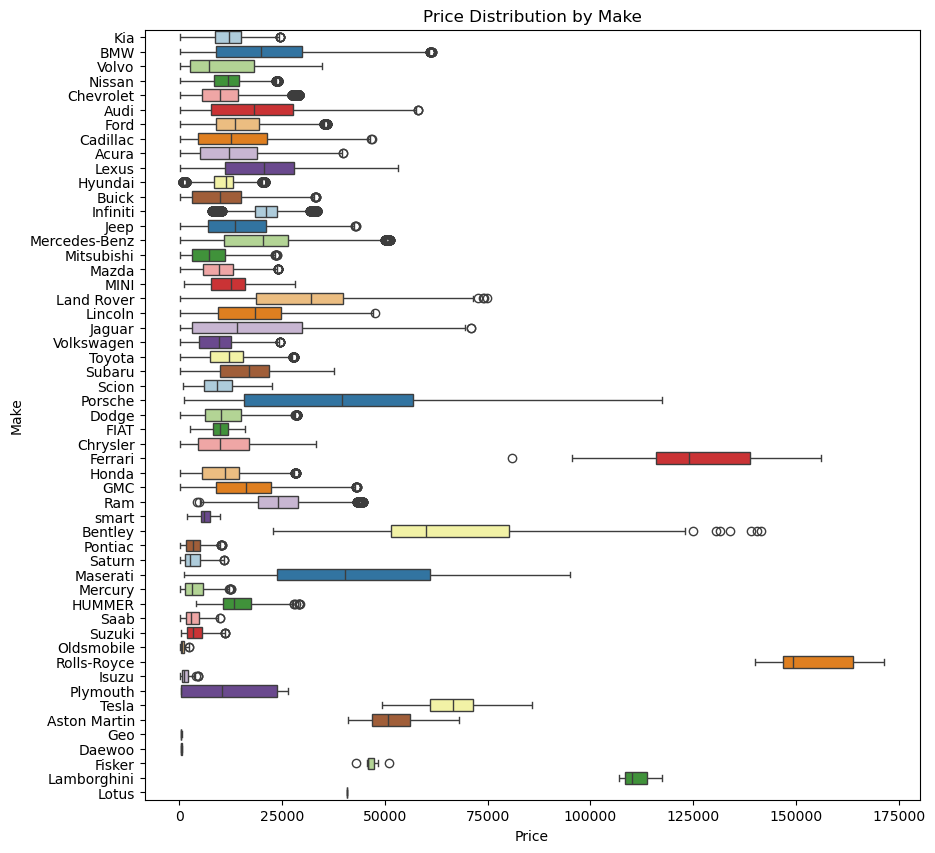

In [19]:
plt.figure(figsize=(10,10))
sns.boxplot(data=w_outliers, y='make', x='sellingprice', palette='Paired')
plt.title('Price Distribution by Make')
plt.ylabel('Make')
plt.xlabel('Price')
plt.show()

After removing outliers we plot a boxplot again and it shows that most of the dispersed values have diseapeard and only some that are close to whiker are left, also the range is reduced to from 200000 to 175000 It also seems that that some brands such as Daewoo, Geo and Oldsmobile have and off representation.

In [20]:
#filtering specific brands to visualize his distributions
daewoo = w_outliers[w_outliers['make'] == 'Daewoo']
geo = w_outliers[w_outliers['make'] == 'Geo']
oldsmobile = w_outliers[w_outliers['make'] == 'Oldsmobile']

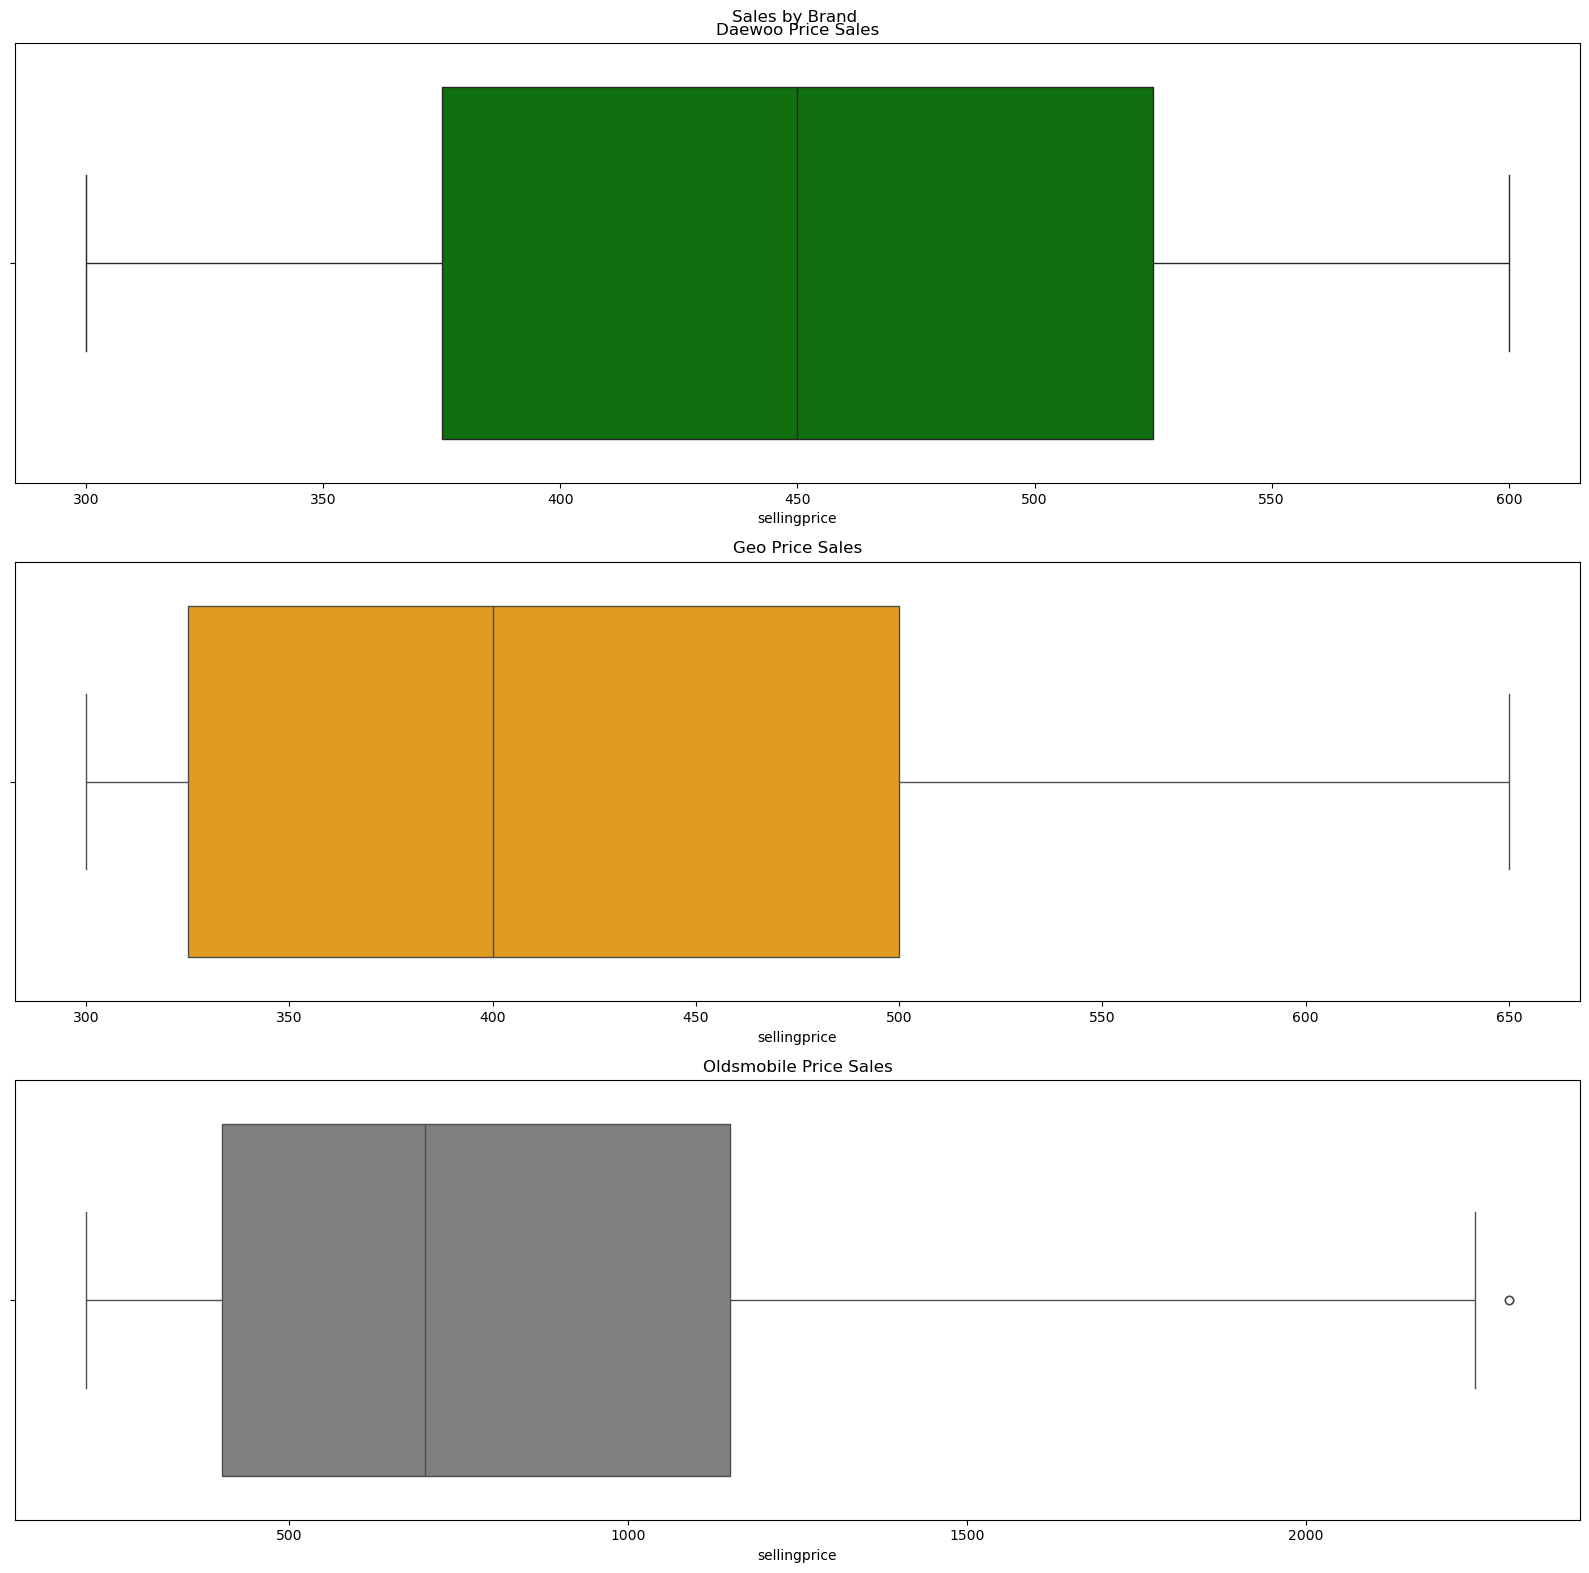

In [21]:

fig, axes = plt.subplots(3, 1, figsize=(16, 16))
plt.suptitle('Sales by Brand')

sns.boxplot(data=daewoo, x='sellingprice', color='green' ,ax=axes[0])
axes[0].set_title('Daewoo Price Sales')

sns.boxplot(data=geo, x='sellingprice', color='orange', ax=axes[1])
axes[1].set_title('Geo Price Sales')

sns.boxplot(data=oldsmobile, x='sellingprice', color='gray', ax=axes[2])
axes[2].set_title('Oldsmobile Price Sales')

plt.tight_layout()
plt.show()

As it was pointed earlier the boxplot showed three brands that had a strange representations, they were filtered and then represented with subplots to see his distributions. It seems that his representation is on that way because there ranges is very low.

In [22]:
def plot_count_distribution(width, height, data, x, top_n=None, palette=None, title=None, xlabel=None, ylabel=None, xtick_rotation=0):
    # Fitlter with top n
    if top_n is not None:
        category_counts = data[x].value_counts()
        top_categories = category_counts.head(top_n).index
        data = data[data[x].isin(top_categories)]    # figure size
    
    plt.figure(figsize=(width, height))

    # personalize the graph with colors and select the colors and axes
    sns.countplot(data=data, x=x, palette=palette)

    # Create the title and label names
    if title:
        plt.title(title)
    if xlabel:
        plt.xlabel(xlabel)
    if ylabel:
        plt.ylabel(ylabel)
    
    # Rotatation of x labels
    plt.xticks(rotation=xtick_rotation)

    plt.show()

Simple function to generate countplots more easily since they are going to be used constantly.

## 4.2 Distribution Graph

C:\Users\Josh2\AppData\Local\Temp\ipykernel_24200\2324335175.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x=x, palette=palette)


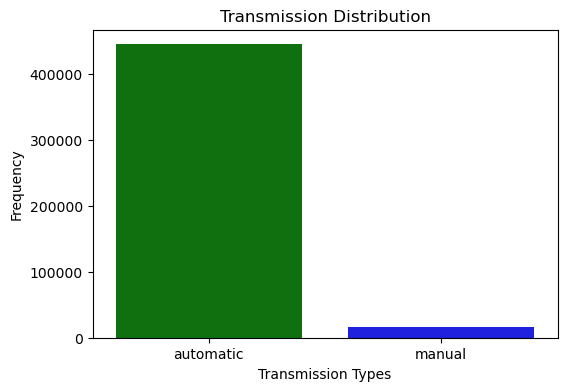

In [23]:
plot_count_distribution(6, 4, w_outliers,'transmission', top_n=None, palette={'automatic' : 'Green', 'manual': 'Blue' }, title='Transmission Distribution', xlabel='Transmission Types', ylabel='Frequency', xtick_rotation=0)

Automatic cars are more frequently sold

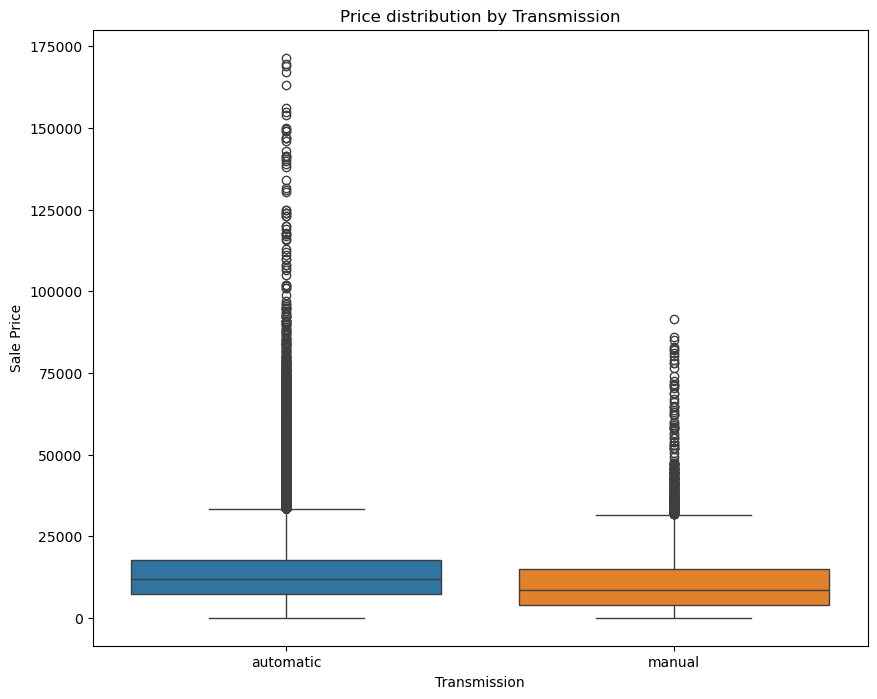

In [24]:
plt.figure(figsize=(10,8))
sns.boxplot(data=w_outliers, y='sellingprice', x='transmission', hue='transmission')
plt.title('Price distribution by Transmission')
plt.xlabel('Transmission')
plt.ylabel('Sale Price')
plt.show()

However althought automatic cars are more frequently sold manual cars are more unexpensive and also the graph suggest that some automatic cars are sold to higher prices comparing it against the rest of them.

C:\Users\Josh2\AppData\Local\Temp\ipykernel_24200\2324335175.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x=x, palette=palette)


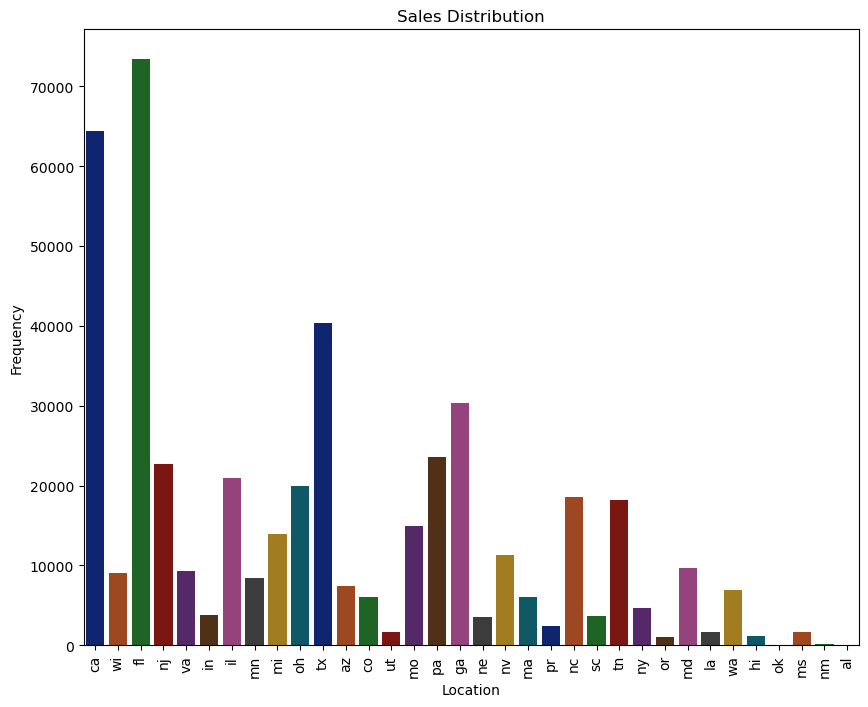

In [25]:
plot_count_distribution(10, 8, w_outliers,'state', top_n=None, palette='dark' , title='Sales Distribution', xlabel='Location', ylabel='Frequency', xtick_rotation=90)

The sales distributions shows that Canada, Florida and Texas are the states where more cars are solds

## 4.3 Correlation Graphs

In [26]:
data_numbers = w_outliers.select_dtypes(include='number')

In [27]:
data_numbers.corr()

,year,condition,odometer,mmr,sellingprice
year,1.000000,0.336173,-0.770561,0.609771,0.599540
condition,0.336173,1.000000,-0.315215,0.292530,0.339655
odometer,-0.770561,-0.315215,1.000000,-0.602759,-0.597237
mmr,0.609771,0.292530,-0.602759,1.000000,0.981676
sellingprice,0.599540,0.339655,-0.597237,0.981676,1.000000


<Axes: >

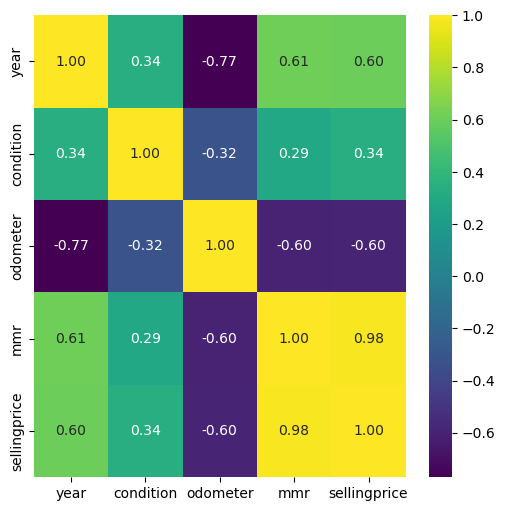

In [28]:
plt.figure(figsize=(6, 6))
sns.heatmap(data_numbers.corr(), annot=True, fmt='.2f', cmap='viridis')

To better understand the data and gain insights more easily we use the correlation method and then a heatmap, with the correlation method we understand that wich variable tend take values or behave in certain way because of other variables then with the heatmap we generate a matrix that shows corraltion using a color scale

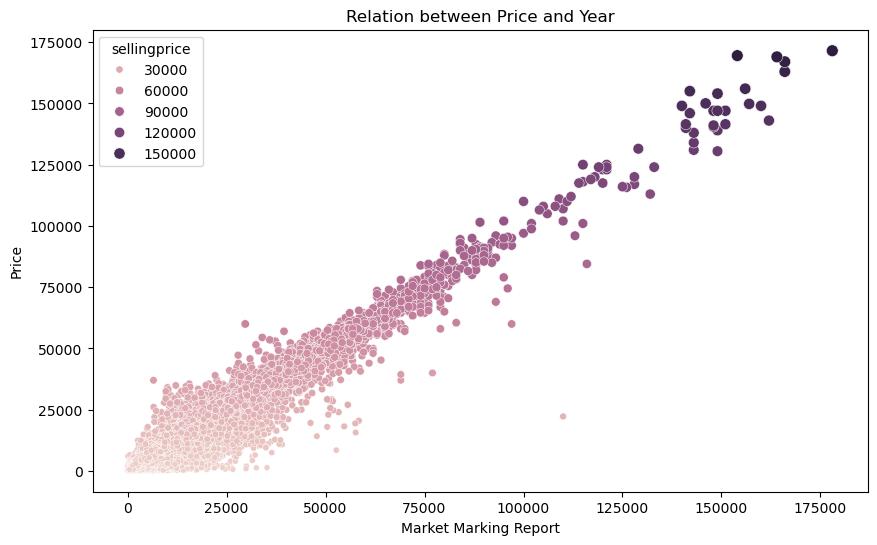

In [29]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=w_outliers, x='mmr', y='sellingprice', hue='sellingprice', size='sellingprice')
plt.title('Relation between Price and Year')
plt.xlabel('Market Marking Report')
plt.ylabel('Price')
plt.show()

This scatterplot simple shows the relationship between the maket value and the price and it tells that the cars are being mostly sold according to the suggested market value.

<Figure size 1000x800 with 0 Axes>

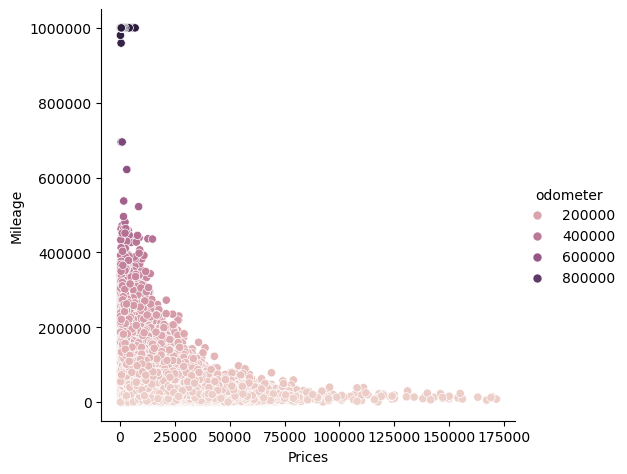

In [30]:
plt.figure(figsize=(10,8))
sns.relplot(data=w_outliers, y='odometer', x='sellingprice', hue='odometer')
plt.ticklabel_format(style='plain')
plt.xlabel('Prices')
plt.ylabel('Mileage')
plt.show()

This scatterplot shows the negative correlation that is between price and odemeter (milage of the car), it simple state that higher the milage lower is the sellingprice but it seems to be a section of the data that has lower milage and does not sells highly.

In [31]:
w_outliers['condition cat'] = pd.cut(w_outliers['condition'], bins=[0, 24, 34, float('inf')], labels=['Bad', 'Good', 'Excellent'])

The conditions seems to be a scaling point from 1 to 49, it is transformed to categorical data so it can be understand it more easily

C:\Users\Josh2\AppData\Local\Temp\ipykernel_24200\3993683462.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=w_outliers, y='sellingprice', x='condition cat', palette='bright')


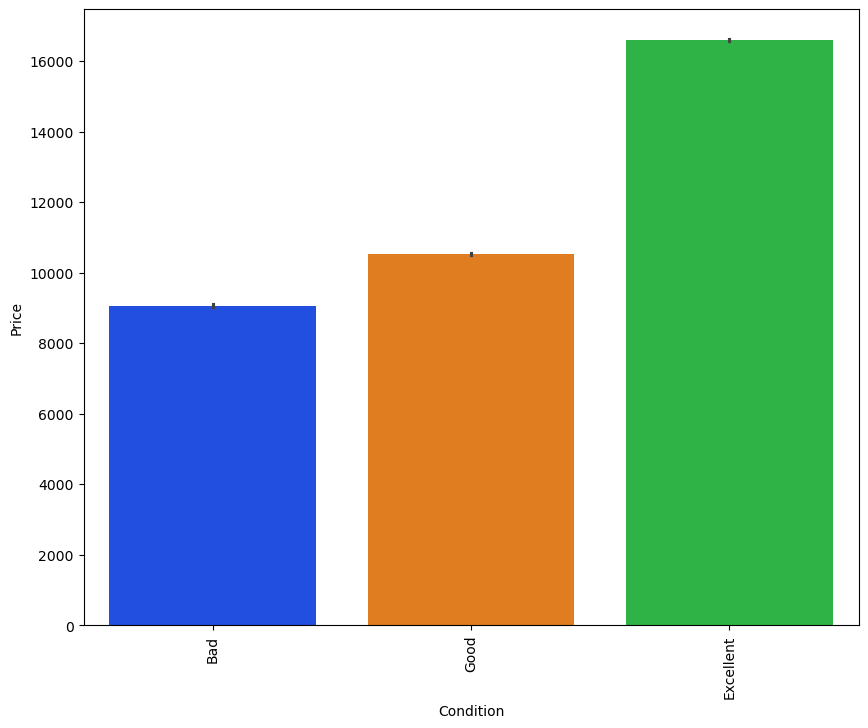

In [32]:
plt.figure(figsize=(10, 8))
sns.barplot(data=w_outliers, y='sellingprice', x='condition cat', palette='bright')
plt.ylabel('Price')
plt.xlabel('Condition')
plt.xticks(rotation=90)
plt.show()

## 5. Insights

C:\Users\Josh2\AppData\Local\Temp\ipykernel_24200\2324335175.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x=x, palette=palette)


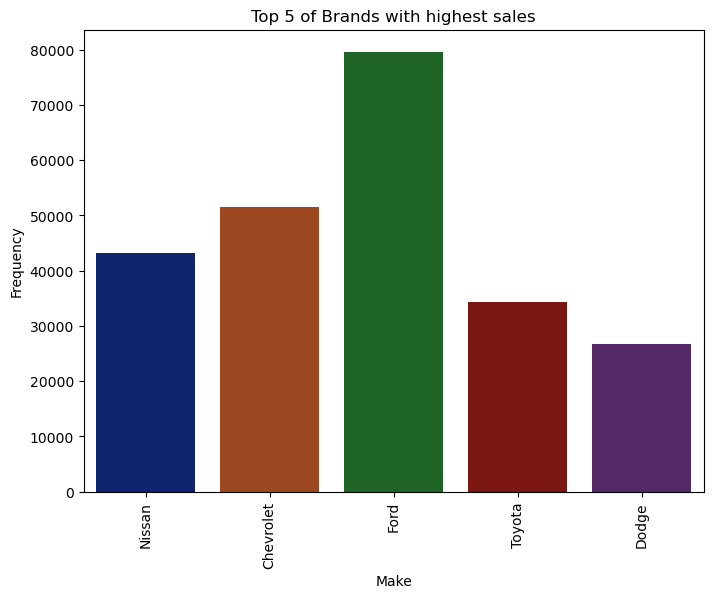

In [33]:
plot_count_distribution(8, 6, w_outliers, 'make', top_n=5, palette='dark', title='Top 5 of Brands with highest sales', xlabel='Make', ylabel='Frequency', xtick_rotation=90)

This graph shows that top 5 of sales by brand with ford, chevrolet and nissan respectively being the brands with highest sales

In [34]:
ford = w_outliers[w_outliers['make'] == 'Ford']
c_ford = ford['model'].value_counts().head().index.tolist()
top_ford = ford[ford['model'].isin(c_ford)]
top_ford['model'].unique()

array(['Fusion', 'Escape', 'Focus', 'Explorer', 'F-150'], dtype=object)

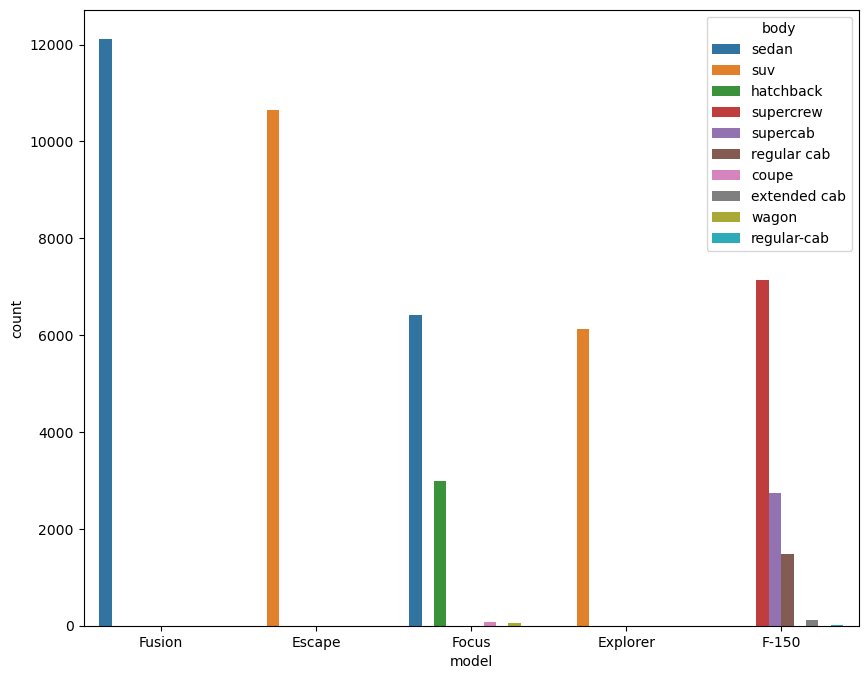

In [35]:
plt.figure(figsize=(10, 8))
sns.countplot(data=top_ford, x='model', hue='body')
plt.show()

Looking the models of ford and his body types that sales the most it can be appreciated that the ford fusion have the highest number of sales also that is a sedan that sales the most

C:\Users\Josh2\AppData\Local\Temp\ipykernel_24200\2079624210.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=ford, x='state', palette='hls')


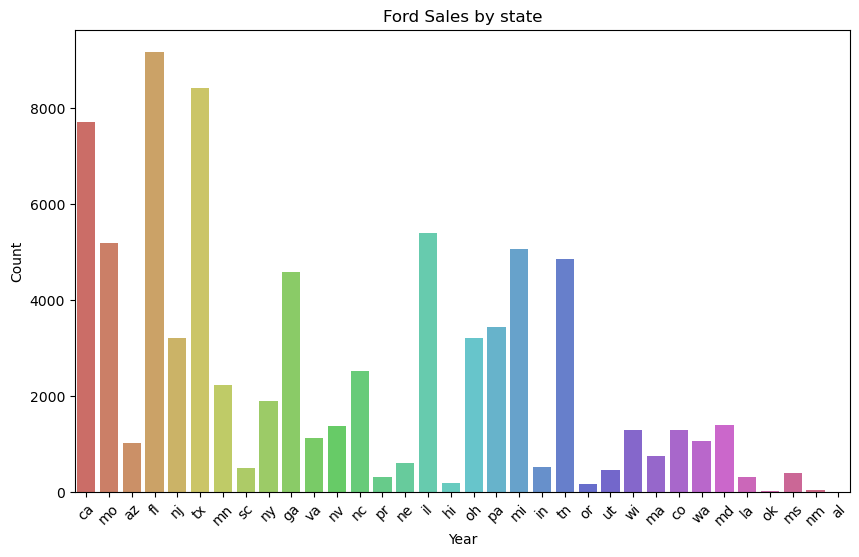

In [36]:
plt.figure(figsize=(10,6))
sns.countplot(data=ford, x='state', palette='hls')
plt.title('Ford Sales by state')
plt.xlabel('Year')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

Ford sales by state, where it can be seen that florida and then texas is where most of the sales are conentrated.

C:\Users\Josh2\AppData\Local\Temp\ipykernel_24200\2324335175.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x=x, palette=palette)


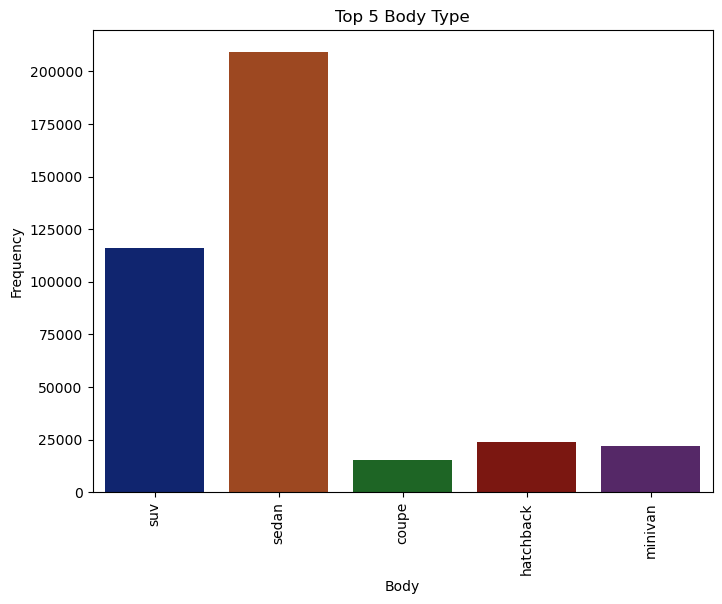

In [37]:
body_type_top5 = w_outliers['body'].value_counts().head()
plot_count_distribution(8, 6, w_outliers, 'body', top_n=5, palette='dark', title='Top 5 Body Type', xlabel='Body', ylabel='Frequency', xtick_rotation=90)

Sales count but by body type, shows that the sedans have the highest number of sales by far

In [38]:
df_sedan = w_outliers[w_outliers['body'] == 'sedan']
df_sedan['make'].value_counts().head()

make
Nissan       26686
Ford         24904
Chevrolet    23128
Toyota       19742
Hyundai      13550
Name: count, dtype: int64

C:\Users\Josh2\AppData\Local\Temp\ipykernel_24200\2324335175.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x=x, palette=palette)


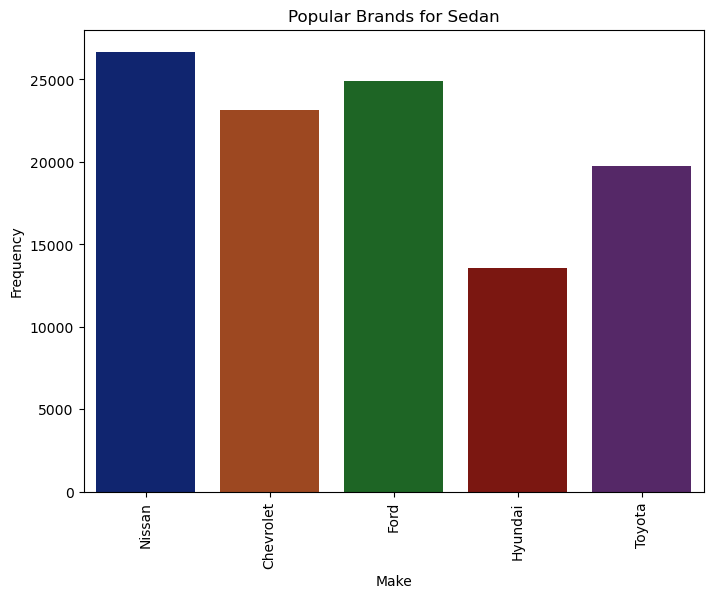

In [39]:
plot_count_distribution(8, 6, df_sedan, 'make', top_n=5, palette='dark', title='Popular Brands for Sedan', xlabel='Make', ylabel='Frequency', xtick_rotation=90)

Althought in general ford is the brand with most sales, when we customize the search to sedans we learn that nissan has most of the sales.

C:\Users\Josh2\AppData\Local\Temp\ipykernel_24200\2324335175.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x=x, palette=palette)


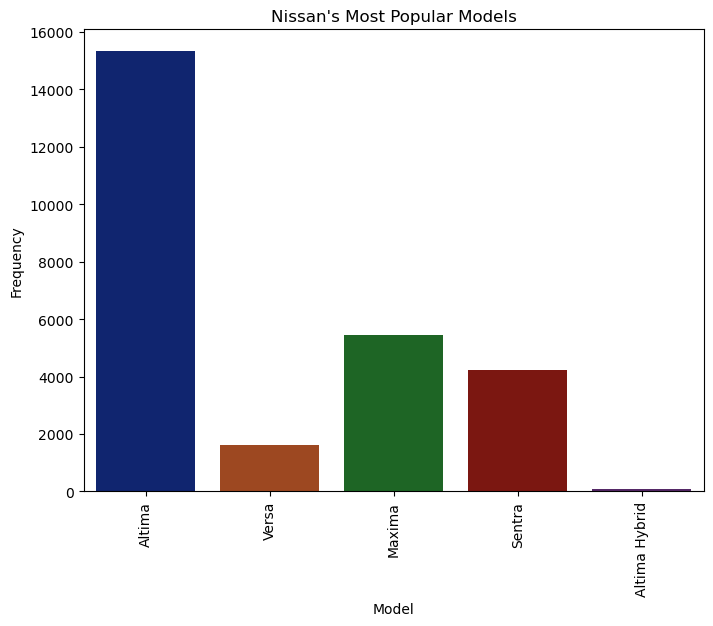

In [40]:
nissan = df_sedan[df_sedan['make'] == 'Nissan']
plot_count_distribution(8, 6, nissan, 'model', palette='dark', title="Nissan's Most Popular Models", xlabel='Model', ylabel='Frequency', xtick_rotation=90)

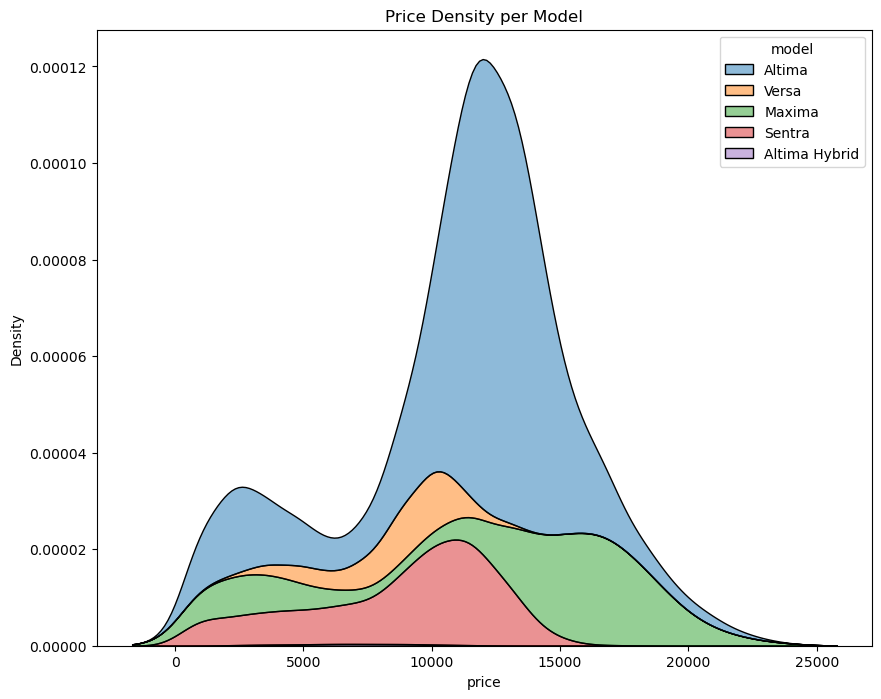

In [41]:
plt.figure(figsize=(10,8))
sns.kdeplot(data=nissan, x='sellingprice', hue='model', multiple='stack', alpha = 0.5)
plt.title('Price Density per Model')
plt.xlabel('price')
plt.ylabel('Density')
plt.show()

With the density graph and countplot we get an idea of the nissan sales; where the altima is the model with most of the sale.

In [42]:
group_make = nissan.groupby('model').agg({
    'odometer': 'mean',
    'condition': 'mean',
    'sellingprice': 'mean'})

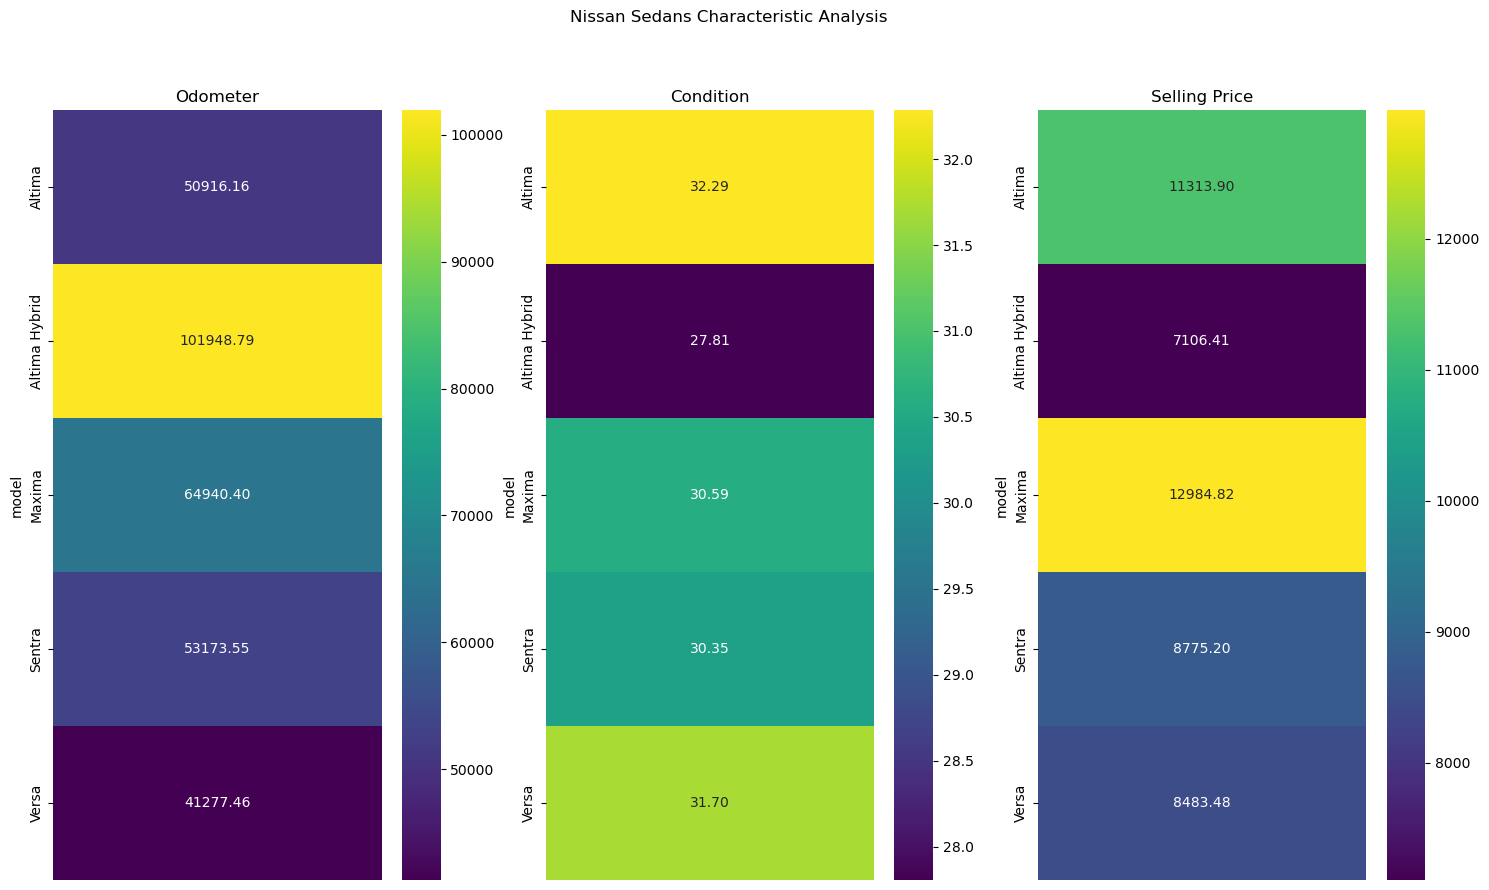

In [43]:
fig, axes = plt.subplots(1, 3, figsize=(18, 10))
plt.suptitle('Nissan Sedans Characteristic Analysis')

sns.heatmap(data=group_make[['odometer']], cmap='viridis', annot=True, fmt=".2f", ax=axes[0])
axes[0].set_title('Odometer')
axes[0].set_xticks([])  

sns.heatmap(data=group_make[['condition']], cmap='viridis', annot=True, fmt=".2f", ax=axes[1])
axes[1].set_title('Condition')
axes[1].set_xticks([])  

sns.heatmap(data=group_make[['sellingprice']], cmap='viridis', annot=True, fmt=".2f", ax=axes[2])
axes[2].set_title('Selling Price')
axes[2].set_xticks([])  

plt.show()

Now let's try to understand why the altima is model with the highest number of solds. For that we have the following theory; the theory is that the withing the market the altima has good values for condition, milage and sellignprice.
Using a heatmap and using the sellingprice, condition and odometer, we can verify this theory.

The heatmap shows that for the milage the altima has the second lowest values which is good since we want low milage and the condition has the highest scores. Now for the selling price the altima is somewhere in the middle but using the other categories we can tell that most of his competitors doesn't have good conditions scores or milages; being the versa the only one that doesen't follow this behavior but without farther date we may not be able to explore this.

In [44]:
altima = nissan[nissan['model'] == 'Altima']

C:\Users\Josh2\AppData\Local\Temp\ipykernel_24200\787983505.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=altima, x='year', palette='tab10')


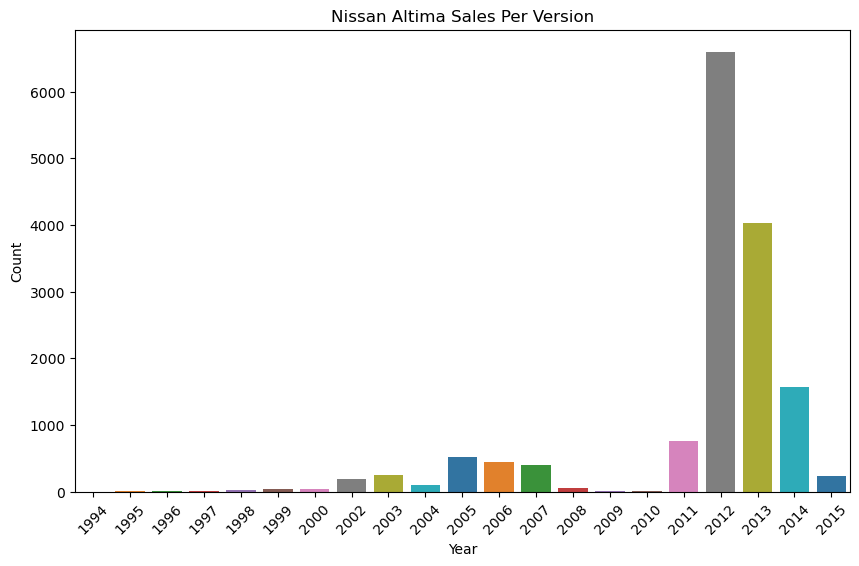

In [45]:
plt.figure(figsize=(10,6))
sns.countplot(data=altima, x='year', palette='tab10')
plt.title('Nissan Altima Sales Per Version')
plt.xlabel('Year')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

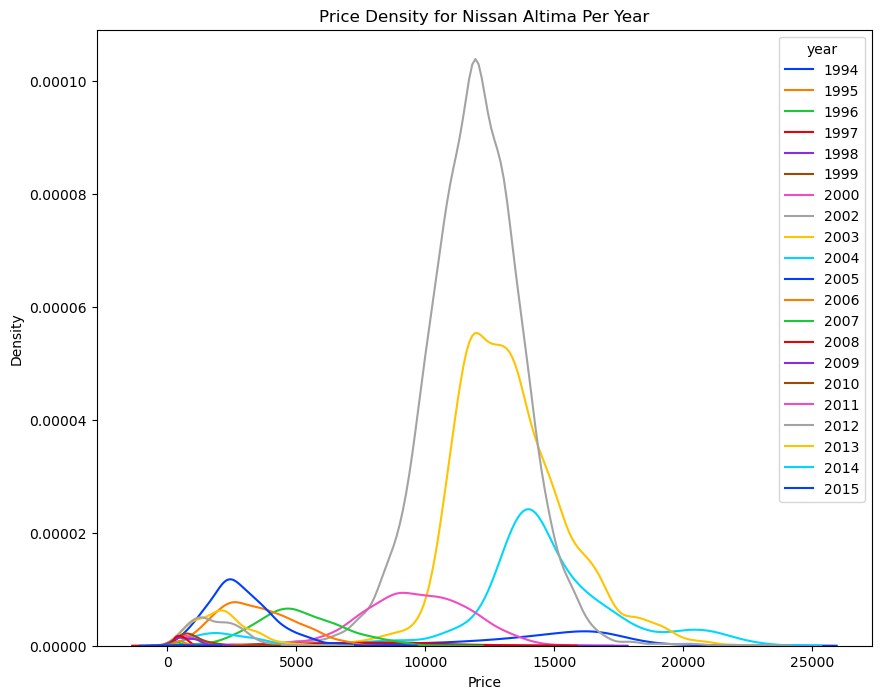

In [46]:
plt.figure(figsize=(10,8))
sns.kdeplot(data=altima, x='sellingprice', hue='year', palette='bright')
plt.title('Price Density for Nissan Altima Per Year')
plt.xlabel('Price')
plt.ylabel('Density')
plt.show()

Now focusing on the altima specifically we can tell that the sells mostly come from the 2012, 2013 and 2014 versions.

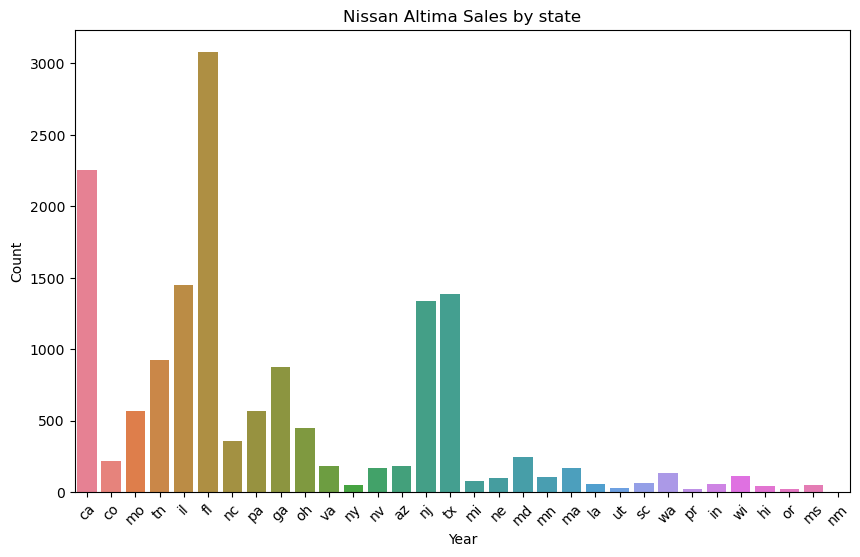

In [47]:
plt.figure(figsize=(10,6))
sns.countplot(data=altima, x='state', hue='state')
plt.title('Nissan Altima Sales by state')
plt.xlabel('Year')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

Lastly the altima is mostly sold on florida or canada.

## 6. Conclusion

Now what valueble information we learn from this EDA of the dataset, well it depends of the context.

Lets put us on the shoes of new cars dealership that is starting to adquire cars to put them on sell and wants to know which model to look for.

With this idea we can tell that Ford is a model that is good sold in most of his body types but to also be on the look of nissan sedans specifically altimas from 2013 and 2012; also we can tell that a good location for the store would be either canada, florida or texas because most of the cars are sold there.

Depending on the situation we then know which information is insighfull for our stakeholders.